# Deep Neural Network in Keras

In this notebook, we improve on our [intermediate neural net](https://github.com/the-deep-learners/deep-learning-illustrated/blob/master/notebooks/intermediate_net_in_keras.ipynb) by applying the theory we've covered since.

#### Load dependencies

In [31]:
import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout # new!
from tensorflow.keras.layers import BatchNormalization
from keras.optimizers import SGD
from keras.layers import Input


#### Load data

In [7]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


#### Preprocess data

In [8]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_valid = X_valid.reshape(10000, 784).astype('float32')

In [9]:
X_train /= 255
X_valid /= 255

In [10]:
n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_valid = keras.utils.to_categorical(y_valid, n_classes)

#### Design neural network architecture

In [18]:
model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(BatchNormalization())

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

In [19]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,978 (234.29 KB)

 Trainable params: 59,594 (232.79 KB)

 Non-trainable params: 384 (1.50 KB)

#### Configure model

In [20]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Train!

In [21]:
model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7796 - loss: 0.7324 - val_accuracy: 0.9499 - val_loss: 0.1691
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9522 - loss: 0.1630 - val_accuracy: 0.9613 - val_loss: 0.1292
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9647 - loss: 0.1148 - val_accuracy: 0.9688 - val_loss: 0.1072
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9731 - loss: 0.0876 - val_accuracy: 0.9727 - val_loss: 0.0899
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9772 - loss: 0.0721 - val_accuracy: 0.9707 - val_loss: 0.0921
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9806 - loss: 0.0630 - val_accuracy: 0.9705 - val_loss: 0.0970
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9816 - loss: 0.0580 - val_accuracy: 0.9740 - val_loss: 0.0871
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9843 - loss: 0.0499 - val_accuracy: 0.

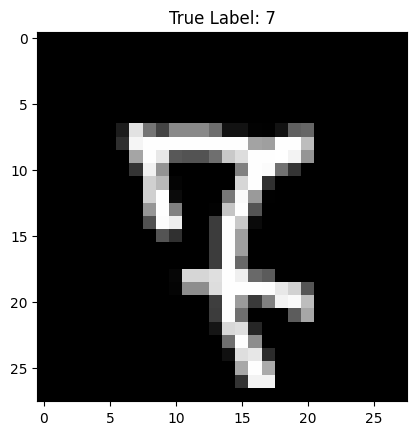

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted number: 8


In [49]:
# @title Validation

random_index = random.randint(0, len(X_valid))
random_validation_image = X_valid[random_index]

plt.imshow(random_validation_image, cmap='gray')
plt.title(f"True Label: {y_valid[random_index]}")
plt.show()

processed_image = random_validation_image.reshape(1, 784).astype('float32')
processed_image /= 255

model.predict(processed_image)

prediction = model.predict(processed_image)
print(f"Predicted number: {np.argmax(prediction)}")